# Validating NN Model

Using validation curves to validate the model performance 

In [17]:
import activation_functions
import loss_functions
import process_MNIST
from init_NN_val import NeuralNetwork
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

#local path to files 
training_images_path =  'training_data/train-images.idx3-ubyte'
training_labels_path =  'training_data/train-labels.idx1-ubyte'
test_images_path = 'test_data/t10k-images.idx3-ubyte'
test_labels_path =  'test_data/t10k-labels.idx1-ubyte'


#Loads MNIST data files. Assumes unzipped idx files avilable at: http://yann.lecun.com/exdb/mnist/
training_images, training_labels = process_MNIST.load_data(training_images_path, training_labels_path)
test_images, test_labels = process_MNIST.load_data(test_images_path, test_labels_path)

Testing Model with Learning Rate 0.001 using Stochastic Gradient Descent

In [18]:
#Define NN architecture. Input size (first layer) and output size (last layer) can't change.
#Will have linear activation functions between each layer, and ReLU activation functions after 
#each linear activation function except between last hidden layer and output layer. 
lsize = [784, 128, 64, 10] #e.g. this structure will have 3 linear activation functions and 2 ReLU fcns
lr = 0.001

##initialize NN 
nn_lr001_sgd = NeuralNetwork(lsize, activation_functions.ReLU, activation_functions.dReLU, loss_functions.cross_entropy_w_softmax, loss_functions.dcross_entropy, lr)

##train NN (example uses mini-batch)
losses = nn_lr001_sgd.train(training_images, training_labels, epochs = 10, batch_size=64) #, debug=True, info_skip=1000)
#gradient descent means batch size = # training samples (# steps you take = # epochs)
#stochastic gradient descent means batch size = 1

##test NN
nn_lr001_sgd_cross_ent_error, nn_lr001_sgd_classification_error = nn_lr001_sgd.test(test_images, test_labels)

 10%|█         | 1/10 [00:32<04:56, 32.97s/it]

epoch loss:  64.80913622201514


 20%|██        | 2/10 [01:01<04:04, 30.59s/it]

epoch loss:  18.454900904189387


 30%|███       | 3/10 [01:30<03:28, 29.75s/it]

epoch loss:  12.117651362897325


 40%|████      | 4/10 [02:10<03:22, 33.75s/it]

epoch loss:  8.906561002587205


 50%|█████     | 5/10 [03:16<03:47, 45.41s/it]

epoch loss:  6.807131257587772


 60%|██████    | 6/10 [04:33<03:44, 56.10s/it]

epoch loss:  5.35238345201723


 70%|███████   | 7/10 [05:21<02:39, 53.33s/it]

epoch loss:  4.263733062435945


 80%|████████  | 8/10 [05:57<01:35, 47.82s/it]

epoch loss:  3.483082036111909


 90%|█████████ | 9/10 [06:32<00:43, 43.78s/it]

epoch loss:  2.919519700198496


100%|██████████| 10/10 [07:08<00:00, 42.87s/it]


epoch loss:  2.5026841820826737
Average cross entropy loss: 2.224441594463673
Classification accuracy: 77.45%


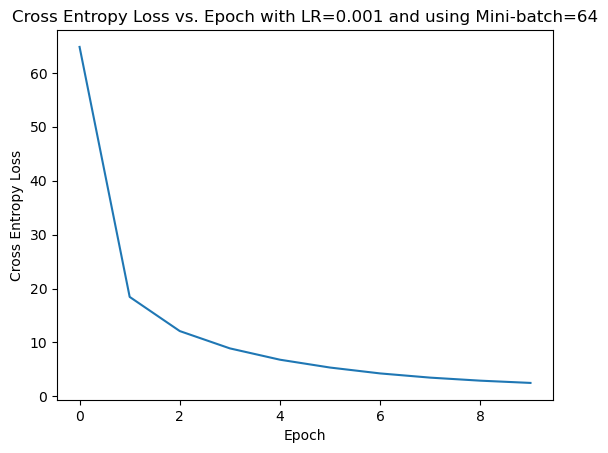

In [19]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.title('Cross Entropy Loss vs. Epoch with LR=0.001 and using Mini-batch=64')
plt.show()

In [20]:
error_summary = stats.describe(nn_lr001_sgd_cross_ent_error)
print("mean: ", np.mean(nn_lr001_sgd_cross_ent_error))
print("median: ", np.median(nn_lr001_sgd_cross_ent_error))
print("min: ", np.min(nn_lr001_sgd_cross_ent_error))
print("max: ", np.max(nn_lr001_sgd_cross_ent_error))
print("variance: ", error_summary.variance)
print("skewness: ", error_summary.skewness)
print("kurtosis: ", error_summary.kurtosis)
print("quartile: ", np.percentile(nn_lr001_sgd_cross_ent_error, q=[10, 25, 50, 75, 90]))
# print("mean: ", np.median(test_loss))

mean:  2.224441594463673
median:  0.00136831814110167
min:  -0.0
max:  211.47479308334707
variance:  60.630229004504805
skewness:  8.742413379059736
kurtosis:  129.20580290764266
quartile:  [-0.00000000e+00  3.03722896e-09  1.36831814e-03  4.78518269e-01
  5.98118440e+00]


In [21]:
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torch.optim as optim
from torch.utils.data import Dataset
import process_MNIST
from init_Pytorch_NN import FeedForwardNN
from scipy import stats
import numpy as np

training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

batch_size = 64

train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)


#Define NN architecture. Input size (first layer) and output size (last layer) can't change.
#Will have linear activation functions between each layer, and ReLU activation functions after 
#each linear activation function except between last hidden layer and output layer. 
# lsize = [784, 128, 64, 10] #e.g. this structure will have 3 linear activation functions and 2 ReLU fcns
input_size = 784  # Example: 28x28 pixels for MNIST dataset
hidden_size = [128, 64]
num_classes = 10  # Example: Number of classes for MNIST dataset
learning_rate = 0.001
num_epochs = 10

#initialize NN 
# nn = NeuralNetwork(lsize, activation_functions.ReLU, activation_functions.dReLU, loss_functions.cross_entropy_w_softmax, loss_functions.dcross_entropy)
model = FeedForwardNN(input_size, hidden_size, num_classes)

##train NN (example uses mini-batch)
# nn.train(training_images, training_labels, epochs = 10, batch_size=1)
# model.train(num_epochs, batch_size=1, learning_rate=learning_rate,  training_data=training_data)
model.train(num_epochs, input_size=input_size, learning_rate=learning_rate,  train_dataloader=train_dataloader, debug=True)
#gradient descent means batch size = # training samples (# steps you take = # epochs)
#stochastic gradient descent means batch size = 1


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [1/10], Step [100/938], Loss: 2.3242


Epoch [1/10], Step [200/938], Loss: 2.2915


Epoch [1/10], Step [300/938], Loss: 2.3152


Epoch [1/10], Step [400/938], Loss: 2.3205


Epoch [1/10], Step [500/938], Loss: 2.2865


545it [00:02, 225.86it/s]

Epoch [1/10], Step [600/938], Loss: 2.2949


Epoch [1/10], Step [700/938], Loss: 2.2996


Epoch [1/10], Step [800/938], Loss: 2.2900


Epoch [1/10], Step [900/938], Loss: 2.3004


938it [00:04, 198.36it/s]
 10%|█         | 1/10 [00:04<00:42,  4.73s/it]

batch loss:  [2.2849137783050537, 2.3285305500030518, 2.3167574405670166, 2.302433490753174, 2.3167037963867188, 2.3171534538269043, 2.2865092754364014, 2.299799680709839, 2.2855567932128906, 2.2998318672180176, 2.297733783721924, 2.3039212226867676, 2.307218313217163, 2.3258817195892334, 2.3097407817840576, 2.3137383460998535, 2.3171331882476807, 2.307865858078003, 2.310908079147339, 2.286900520324707, 2.2833518981933594, 2.3018956184387207, 2.2961037158966064, 2.316088914871216, 2.3158276081085205, 2.2890732288360596, 2.295722246170044, 2.2998616695404053, 2.3005032539367676, 2.2981626987457275, 2.311629295349121, 2.278623104095459, 2.3073863983154297, 2.298220157623291, 2.3433308601379395, 2.319019079208374, 2.325094223022461, 2.3190622329711914, 2.3048038482666016, 2.3071463108062744, 2.2991926670074463, 2.313016176223755, 2.291625499725342, 2.286628246307373, 2.318115472793579, 2.291494607925415, 2.319493293762207, 2.311155319213867, 2.322350263595581, 2.3057727813720703, 2.324611

Epoch [2/10], Step [100/938], Loss: 2.2686


Epoch [2/10], Step [200/938], Loss: 2.2660


Epoch [2/10], Step [300/938], Loss: 2.2474


336it [00:01, 176.40it/s]

Epoch [2/10], Step [400/938], Loss: 2.2564


Epoch [2/10], Step [500/938], Loss: 2.2726


Epoch [2/10], Step [600/938], Loss: 2.2591


Epoch [2/10], Step [700/938], Loss: 2.2569


Epoch [2/10], Step [800/938], Loss: 2.2571


832it [00:04, 155.85it/s]

Epoch [2/10], Step [900/938], Loss: 2.2478


938it [00:05, 175.21it/s]
 20%|██        | 2/10 [00:10<00:40,  5.10s/it]

batch loss:  [2.29175066947937, 2.280580997467041, 2.280390501022339, 2.2802836894989014, 2.2704131603240967, 2.2781360149383545, 2.2752835750579834, 2.273496150970459, 2.2782273292541504, 2.2914645671844482, 2.287757158279419, 2.2838633060455322, 2.279695987701416, 2.2854695320129395, 2.26454758644104, 2.2892422676086426, 2.294015645980835, 2.2774789333343506, 2.29830002784729, 2.287959098815918, 2.2763919830322266, 2.279435396194458, 2.3017420768737793, 2.2916572093963623, 2.266967296600342, 2.2828710079193115, 2.2776167392730713, 2.285207509994507, 2.2669451236724854, 2.2875137329101562, 2.27534556388855, 2.2705013751983643, 2.2688586711883545, 2.2823374271392822, 2.2662527561187744, 2.276519775390625, 2.275287628173828, 2.291424512863159, 2.278425931930542, 2.2863619327545166, 2.262239933013916, 2.2871882915496826, 2.3029301166534424, 2.2837226390838623, 2.27439284324646, 2.2767345905303955, 2.2801716327667236, 2.2748918533325195, 2.281205177307129, 2.2833688259124756, 2.2984960079

Epoch [3/10], Step [100/938], Loss: 2.2369


Epoch [3/10], Step [200/938], Loss: 2.2469


Epoch [3/10], Step [300/938], Loss: 2.2295


Epoch [3/10], Step [400/938], Loss: 2.2282


Epoch [3/10], Step [500/938], Loss: 2.2288


Epoch [3/10], Step [600/938], Loss: 2.2121


Epoch [3/10], Step [700/938], Loss: 2.1956


738it [00:03, 195.52it/s]

Epoch [3/10], Step [800/938], Loss: 2.1866


938it [00:04, 196.16it/s]

Epoch [3/10], Step [900/938], Loss: 2.2139



 30%|███       | 3/10 [00:14<00:34,  4.96s/it]

batch loss:  [2.241358995437622, 2.24544095993042, 2.2421531677246094, 2.2394723892211914, 2.2305688858032227, 2.2487268447875977, 2.2528812885284424, 2.244243860244751, 2.2641239166259766, 2.2410640716552734, 2.245018243789673, 2.260488510131836, 2.233920097351074, 2.2408933639526367, 2.2331864833831787, 2.245187282562256, 2.236579656600952, 2.235395908355713, 2.2369585037231445, 2.2553768157958984, 2.26108455657959, 2.2388458251953125, 2.2290377616882324, 2.2469184398651123, 2.2535061836242676, 2.2475478649139404, 2.243366241455078, 2.2397444248199463, 2.2387354373931885, 2.252883195877075, 2.2479727268218994, 2.2533116340637207, 2.2325620651245117, 2.2433595657348633, 2.2504100799560547, 2.2562434673309326, 2.228372097015381, 2.2573328018188477, 2.2377591133117676, 2.233822822570801, 2.248089075088501, 2.2513375282287598, 2.240947723388672, 2.2440903186798096, 2.2252402305603027, 2.2360916137695312, 2.236294746398926, 2.2554550170898438, 2.251478672027588, 2.2309539318084717, 2.2580

Epoch [4/10], Step [100/938], Loss: 2.1974


141it [00:00, 203.00it/s]

Epoch [4/10], Step [200/938], Loss: 2.1920


Epoch [4/10], Step [300/938], Loss: 2.1669


334it [00:01, 193.76it/s]

Epoch [4/10], Step [400/938], Loss: 2.1516


Epoch [4/10], Step [500/938], Loss: 2.1464


Epoch [4/10], Step [600/938], Loss: 2.1629


Epoch [4/10], Step [700/938], Loss: 2.1665


Epoch [4/10], Step [800/938], Loss: 2.1411


938it [00:04, 196.70it/s]

Epoch [4/10], Step [900/938], Loss: 2.0857



 40%|████      | 4/10 [00:19<00:29,  4.88s/it]

batch loss:  [2.175391912460327, 2.192211389541626, 2.1785848140716553, 2.212822914123535, 2.200040578842163, 2.1863811016082764, 2.2077276706695557, 2.1643850803375244, 2.2150752544403076, 2.1856791973114014, 2.2067205905914307, 2.1758229732513428, 2.1828179359436035, 2.1886041164398193, 2.1922707557678223, 2.192674160003662, 2.1938252449035645, 2.1931872367858887, 2.1815381050109863, 2.194197416305542, 2.165133237838745, 2.200272560119629, 2.1904451847076416, 2.1927552223205566, 2.1893482208251953, 2.176009178161621, 2.1994707584381104, 2.199990749359131, 2.186723232269287, 2.1963658332824707, 2.18190860748291, 2.2171638011932373, 2.21690034866333, 2.1845273971557617, 2.190141439437866, 2.2009339332580566, 2.189661741256714, 2.1801533699035645, 2.216609477996826, 2.1938600540161133, 2.1848487854003906, 2.2091879844665527, 2.1775941848754883, 2.167182207107544, 2.1910126209259033, 2.1873116493225098, 2.184868574142456, 2.1911520957946777, 2.1969597339630127, 2.1782493591308594, 2.2219

Epoch [5/10], Step [100/938], Loss: 2.0895


Epoch [5/10], Step [200/938], Loss: 2.1090


Epoch [5/10], Step [300/938], Loss: 2.0484


Epoch [5/10], Step [400/938], Loss: 1.9908


Epoch [5/10], Step [500/938], Loss: 2.0148


Epoch [5/10], Step [600/938], Loss: 2.0252


Epoch [5/10], Step [700/938], Loss: 2.0102


Epoch [5/10], Step [800/938], Loss: 1.9266


938it [00:04, 187.79it/s]

Epoch [5/10], Step [900/938], Loss: 1.9481



 50%|█████     | 5/10 [00:24<00:24,  4.93s/it]

batch loss:  [2.0982837677001953, 2.0965476036071777, 2.0948774814605713, 2.1402628421783447, 2.097214937210083, 2.094304084777832, 2.1308274269104004, 2.0860610008239746, 2.1086976528167725, 2.126371383666992, 2.104660987854004, 2.1049299240112305, 2.1068410873413086, 2.1099817752838135, 2.1072463989257812, 2.1491777896881104, 2.0984785556793213, 2.0753254890441895, 2.111506223678589, 2.0987038612365723, 2.1306402683258057, 2.099975824356079, 2.1089305877685547, 2.06555438041687, 2.1083624362945557, 2.093336343765259, 2.1027750968933105, 2.0927059650421143, 2.087522506713867, 2.141387462615967, 2.0524094104766846, 2.088292360305786, 2.121938943862915, 2.08815860748291, 2.108226776123047, 2.1128454208374023, 2.123924493789673, 2.1138722896575928, 2.1135082244873047, 2.0633983612060547, 2.115610122680664, 2.100736379623413, 2.1133012771606445, 2.101248264312744, 2.118520736694336, 2.1263234615325928, 2.1127004623413086, 2.087928533554077, 2.104353427886963, 2.110053777694702, 2.12617945

Epoch [6/10], Step [100/938], Loss: 1.9212


Epoch [6/10], Step [200/938], Loss: 1.9163


Epoch [6/10], Step [300/938], Loss: 1.9680


Epoch [6/10], Step [400/938], Loss: 1.9026


Epoch [6/10], Step [500/938], Loss: 1.8901


539it [00:02, 220.96it/s]

Epoch [6/10], Step [600/938], Loss: 1.7824


Epoch [6/10], Step [700/938], Loss: 1.8138


Epoch [6/10], Step [800/938], Loss: 1.7645


938it [00:04, 197.19it/s]

Epoch [6/10], Step [900/938], Loss: 1.7905



 60%|██████    | 6/10 [00:29<00:19,  4.87s/it]

batch loss:  [1.8811023235321045, 1.998436689376831, 1.934569001197815, 2.015707492828369, 1.9803205728530884, 1.9637835025787354, 1.9870033264160156, 1.9683570861816406, 1.9728957414627075, 1.9516421556472778, 1.933249831199646, 1.908960223197937, 1.9200823307037354, 1.9618641138076782, 1.9460225105285645, 1.9941928386688232, 1.976484775543213, 1.9554224014282227, 1.9082822799682617, 1.9394491910934448, 1.9090803861618042, 1.9389597177505493, 1.9234800338745117, 1.9583133459091187, 1.9284695386886597, 1.9252287149429321, 1.9695119857788086, 1.9057376384735107, 1.9885003566741943, 1.937683343887329, 1.9791772365570068, 1.9506734609603882, 1.9841703176498413, 1.9067893028259277, 1.9544320106506348, 1.8838038444519043, 1.9563182592391968, 1.9588088989257812, 1.9575741291046143, 1.9266196489334106, 1.9373608827590942, 1.9859638214111328, 1.9490604400634766, 1.916925311088562, 1.9996240139007568, 1.9921116828918457, 1.9168802499771118, 1.97200345993042, 1.951960802078247, 1.893231511116027

Epoch [7/10], Step [100/938], Loss: 1.7387


Epoch [7/10], Step [200/938], Loss: 1.6329


Epoch [7/10], Step [300/938], Loss: 1.6383


Epoch [7/10], Step [400/938], Loss: 1.6065


441it [00:02, 209.59it/s]

Epoch [7/10], Step [500/938], Loss: 1.5119


Epoch [7/10], Step [600/938], Loss: 1.4553


Epoch [7/10], Step [700/938], Loss: 1.4704


Epoch [7/10], Step [800/938], Loss: 1.3840


836it [00:04, 194.83it/s]

Epoch [7/10], Step [900/938], Loss: 1.4366


938it [00:04, 193.84it/s]
 70%|███████   | 7/10 [00:34<00:14,  4.86s/it]

batch loss:  [1.7121403217315674, 1.717111587524414, 1.7490932941436768, 1.7761188745498657, 1.756646752357483, 1.6892575025558472, 1.6161997318267822, 1.729234218597412, 1.781504511833191, 1.735528826713562, 1.7702792882919312, 1.7515590190887451, 1.7285000085830688, 1.7146730422973633, 1.6427236795425415, 1.7220031023025513, 1.738006353378296, 1.6879675388336182, 1.7424286603927612, 1.666887879371643, 1.6684156656265259, 1.6967086791992188, 1.819711685180664, 1.7502468824386597, 1.6042314767837524, 1.6695489883422852, 1.714701533317566, 1.7812530994415283, 1.7512425184249878, 1.761093258857727, 1.7470500469207764, 1.7401758432388306, 1.736496090888977, 1.709580659866333, 1.6583631038665771, 1.728060245513916, 1.744227409362793, 1.6875600814819336, 1.7691794633865356, 1.6904462575912476, 1.7145895957946777, 1.708975911140442, 1.7897428274154663, 1.7180670499801636, 1.7690578699111938, 1.7208483219146729, 1.7476928234100342, 1.729148030281067, 1.7046761512756348, 1.7395821809768677, 1.

Epoch [8/10], Step [100/938], Loss: 1.4520


Epoch [8/10], Step [200/938], Loss: 1.2636


Epoch [8/10], Step [300/938], Loss: 1.4243


Epoch [8/10], Step [400/938], Loss: 1.3891


Epoch [8/10], Step [500/938], Loss: 1.2789


523it [00:02, 164.84it/s]

Epoch [8/10], Step [600/938], Loss: 1.3039


Epoch [8/10], Step [700/938], Loss: 1.2763


Epoch [8/10], Step [800/938], Loss: 1.1825


938it [00:04, 197.38it/s]
 80%|████████  | 8/10 [00:39<00:09,  4.83s/it]

Epoch [8/10], Step [900/938], Loss: 1.2132
batch loss:  [1.4152354001998901, 1.4438450336456299, 1.4964362382888794, 1.3842778205871582, 1.3499834537506104, 1.4817891120910645, 1.5114436149597168, 1.4734580516815186, 1.50576651096344, 1.4277520179748535, 1.4137941598892212, 1.4992153644561768, 1.473192811012268, 1.4928380250930786, 1.425878643989563, 1.3814457654953003, 1.351454734802246, 1.4066845178604126, 1.378746747970581, 1.3843543529510498, 1.3848850727081299, 1.5408217906951904, 1.422249436378479, 1.4164917469024658, 1.3854080438613892, 1.3784700632095337, 1.4781365394592285, 1.4295721054077148, 1.4202457666397095, 1.424174427986145, 1.4329123497009277, 1.3779629468917847, 1.3898414373397827, 1.4095654487609863, 1.3823479413986206, 1.4949233531951904, 1.4527266025543213, 1.4101414680480957, 1.3881864547729492, 1.4519133567810059, 1.4327853918075562, 1.4274554252624512, 1.4091254472732544, 1.4722330570220947, 1.3305996656417847, 1.4855955839157104, 1.3822908401489258, 1.396803140

Epoch [9/10], Step [100/938], Loss: 1.1337


Epoch [9/10], Step [200/938], Loss: 1.1713


247it [00:01, 219.14it/s]

Epoch [9/10], Step [300/938], Loss: 1.0569


Epoch [9/10], Step [400/938], Loss: 1.0225


Epoch [9/10], Step [500/938], Loss: 1.0245


Epoch [9/10], Step [600/938], Loss: 0.9171


640it [00:03, 212.16it/s]

Epoch [9/10], Step [700/938], Loss: 0.9368


Epoch [9/10], Step [800/938], Loss: 0.9760


938it [00:04, 198.19it/s]

Epoch [9/10], Step [900/938], Loss: 1.0272



 90%|█████████ | 9/10 [00:43<00:04,  4.80s/it]

batch loss:  [1.1363483667373657, 1.1932425498962402, 1.1563615798950195, 1.144991159439087, 1.1976888179779053, 1.2371060848236084, 1.2465558052062988, 1.1764450073242188, 1.0892095565795898, 1.0935852527618408, 0.9759679436683655, 1.1374038457870483, 1.132065773010254, 1.1768686771392822, 1.2084877490997314, 1.2256524562835693, 1.0993512868881226, 1.0874130725860596, 1.2110369205474854, 1.1584017276763916, 1.1488316059112549, 1.158046841621399, 1.1202894449234009, 1.2883265018463135, 1.0654093027114868, 1.0543413162231445, 1.24807870388031, 1.1137721538543701, 1.125363826751709, 1.0397320985794067, 1.1002511978149414, 1.0380975008010864, 1.1479160785675049, 1.0194275379180908, 1.1353375911712646, 1.0146360397338867, 1.117984652519226, 1.2051299810409546, 1.1014958620071411, 1.13808274269104, 1.1058766841888428, 1.1815372705459595, 1.234071969985962, 1.0516791343688965, 1.2979581356048584, 1.277309536933899, 1.1488972902297974, 1.075653314590454, 1.0779752731323242, 1.0966262817382812

Epoch [10/10], Step [100/938], Loss: 0.9130


Epoch [10/10], Step [200/938], Loss: 1.0088


Epoch [10/10], Step [300/938], Loss: 0.9361


Epoch [10/10], Step [400/938], Loss: 0.8857


Epoch [10/10], Step [500/938], Loss: 0.8754


Epoch [10/10], Step [600/938], Loss: 0.8592


Epoch [10/10], Step [700/938], Loss: 0.6963


Epoch [10/10], Step [800/938], Loss: 0.8666


938it [00:04, 224.49it/s]

Epoch [10/10], Step [900/938], Loss: 0.7834



100%|██████████| 10/10 [00:47<00:00,  4.79s/it]

batch loss:  [1.095628023147583, 0.932654857635498, 0.8687024116516113, 0.9201990365982056, 0.8768656253814697, 0.9740101099014282, 0.796413242816925, 0.9563326835632324, 0.932970404624939, 0.9966768026351929, 0.9468461275100708, 0.9689592719078064, 0.9907003045082092, 0.961444079875946, 1.0099159479141235, 1.0772846937179565, 0.940721869468689, 0.7858467698097229, 0.8950962424278259, 0.9556872248649597, 0.973494827747345, 0.8529995083808899, 0.8461498618125916, 1.0050649642944336, 1.097180962562561, 1.054588794708252, 1.022101640701294, 0.956703782081604, 1.0220108032226562, 0.8036016225814819, 0.9620246291160583, 0.9043469429016113, 0.8308302164077759, 0.9421009421348572, 0.9850313663482666, 0.9494721293449402, 0.8635064363479614, 0.9260185956954956, 0.9946072101593018, 0.9843069314956665, 0.9259865283966064, 0.8259100317955017, 0.9933941960334778, 0.8469463586807251, 0.9137022495269775, 0.9951518774032593, 0.8720998764038086, 0.923239529132843, 0.9541969895362854, 1.0196940898895264

[2.2955572643259696,
 2.265817935278675,
 2.22254346377814,
 2.1515060536134474,
 2.0351703075457737,
 1.8485510959299898,
 1.5843599397998882,
 1.291260561391489,
 1.0452828039365536,
 0.8726230099765476]

In [22]:
##test NN
# cross_ent_error, classification_error = nn.test(test_images, test_labels)
cross_ent_errors, classification_matches = model.test(test_dataloader, input_size=input_size)
classification_matches_fixed = [x[0] for x in classification_matches]

print('Average cross entropy loss:', np.mean(cross_ent_errors))
print(f"Classification accuracy: {(sum(classification_matches_fixed)/test_data.test_labels.size(0))*100}%")

Average cross entropy loss: 0.7888928
Classification accuracy: 80.93%


In [23]:
error_summary = stats.describe(cross_ent_errors)
print("mean: ", np.mean(cross_ent_errors))
print("median: ", np.median(cross_ent_errors))
print("min: ", np.min(cross_ent_errors))
print("max: ", np.max(cross_ent_errors))
print("variance: ", error_summary.variance)
print("skewness: ", error_summary.skewness)
print("kurtosis: ", error_summary.kurtosis)
print("quartile: ", np.percentile(cross_ent_errors, q=[10, 25, 50, 75, 90]))

# print("mean: ", np.mean(cross_ent_errors))
# print("median: ", np.median(cross_ent_errors))
# print("min: ", np.min(cross_ent_errors))
# print("max: ", np.max(cross_ent_errors))
# print("variance: ", stats.describe(cross_ent_errors).variance)
# print("quartile: ", np.percentile(cross_ent_errors, q=[10, 25, 50, 75, 90]))

mean:  0.7888928
median:  0.7867727
min:  0.56679624
max:  1.0638981
variance:  0.0074332143592003444
skewness:  0.41468501004286784
kurtosis:  0.4525290237837418
quartile:  [0.68488486 0.72669762 0.78677273 0.83812958 0.8984013 ]
